# **Welcome to the EPAT guided mini-project (Solution)**

#### Date created: 9 April 2023
#### Last updated on: 8 May 2023
#### Created by: Saaransh Marwah and Jose Carlos Gonzales Tanaka
#### Reviewed by: Vivek Krishnamoorthy

<div class="alert alert-warning ">
EPAT-guided projects aim to give you a flavor of solving a real-world problem using Python.  
    
Here's what we'll do.

- We'll give you a step-wise process to follow so that you understand how to analyze a problem and break it down into steps.
- We'll provide hints for the complicated steps. You can use them if you get stuck somewhere. This will ensure you do not spend too much time stranded at a particular step.
- **We urge you to search for solutions on the internet too. That's what you'll do outdoors, and we think it is an essential part of learning to program.**
- You can explore alternative ways to solve the problem.
- Guided projects are not graded or reviewed. You need to code the solution and run it successfully to evaluate your progress.
- We provide a model solution of the project against which you can compare your code for self-review.
- The duration of this project is ONE week. You need to complete the project within that time.

Let's begin!
</div>

# **Topic: Creating and backtesting an options trading strategy**
<div class="alert alert-info ">
    <strong>Problem statement:</strong>


- You would need to handle both the spot and derivative data of the underlying asset.
- The idea is to backtest an option strategy that you trade manually based on the movement of underlying stocks in the spot market.

In this project, you will perform the following using Python:
- Handling spot data of the underlying
- Handling options data of the underlying
- Trading options based on signals from spot market data
</div>

# Model Solution
In this notebook, we provide a model solution to an options strategy for the project. You can refer to this if you are stuck in any step while working on the project. The features and parameters added here are not exhaustive or fine-tuned.

The model solution guides us through answering the problem statements posed in the project. The notebook structure is as follows:
1. [Importing the libraries](#import)
2. [Data preprocessing](#preprocessing)
3. [Handling Nifty spot data and creating bullish / bearish Signals](#spot)
4. [Handling complex Nifty options data](#option)
5. [Trading options and generating the trade book](#trades)
6. [Analyzing  the strategy using the trade book](#analysis)

<a id='import'></a>
## Section 1: Importing the libraries

- This will be the first step for any Python project that you do.
- In this section, we import all required Python libraries used for computation

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from datetime import datetime

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

<a id='preprocessing'></a>
## Section 2: Data preprocessing


This is a crucial step performed when we work with datasets.

In this section, we perform some quality checks to ensure that our data is consistent and will provide us with intelligible results.

What are the different errors that we may encounter in our data and that we should resolve before moving to the next section of the project?

- Error 1: Missing values in the dataset.
- Error 2: Duplicate rows in the dataset.
- Error 3: This is applicable when working with options data. There may be rows that have data on expired options.

We will handle each error one by one.

### We import raw (uncleaned) options data. Our  goal is to get rid of all the errors present in this data.

In [ ]:
uncleaned_data = pd.read_pickle('nifty_options_data_2019_2022_raw.bz2')

### Error 1
There are 2 ways to check for missing values (also known as null values).

##### 1st way

You can use the `info()` method to know the rows with missing values.

##### Syntax
```python
DataFrame.info()
```
This function returns the datatype for each column in our dataframe and the number of non-missing values. If the number of non-missing values is different for any column, this means there are missing values  present in our dataset.

In [ ]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127605 entries, 0 to 127604
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           127605 non-null  datetime64[ns]
 1   Symbol         127605 non-null  object        
 2   Expiry         127605 non-null  object        
 3   Option Type    127605 non-null  object        
 4   Strike Price   127605 non-null  int64         
 5   Close          127605 non-null  float64       
 6   Last           127605 non-null  float64       
 7   Open Interest  127601 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 7.8+ MB


##### 2nd way

You can use the `isna().sum()` method to know the rows with missing values.

##### Syntax
```python
DataFrame.isna().sum()
```
This function gives us the count of null  values for each column. The `isna()` function detects the missing values in a dataframe. It returns a Boolean value indicating if the values are NA. It returns `True` or `1` for every value that is NA and `False` or `0` otherwise.
You will also use the `sum()` function to get the total missing values in our dataset, i.e., the sum of all `True` or `1` values returned by the `isna()` function.

In [ ]:
uncleaned_data.isna().sum()

Date             0
Symbol           0
Expiry           0
Option Type      0
Strike Price     0
Close            0
Last             0
Open Interest    4
dtype: int64

### Resolving Error 1

You can use the `dropna()` method to drop the rows with missing values.

##### Syntax
```python
DataFrame.dropna(axis=0, how='any', inplace=True)
```
1. **axis**: Determines if rows or columns which contain missing values are removed <br>
   * `0`, or `'index'`: Drops rows that contain missing values.
   * `1`, or `'columns'`: Drops columns that contain missing values.<br>
<br>
2. **how**: This parameter enables you to specify "how" the method will decide to drop a row or column from the dataframe. <br>
   * `how='any'` means dropna will drop the row if any of the values in that row are missing. <br>
   * `how='all'` means dropna will drop the row only if all the values in that row are missing.<br>
<br>
3. **inplace**: boolean, default False.
    * When `inplace=True`, the changes are saved in the existing dataframe.
    * When `inplace=False`, the changes will not reflect in the original dataframe. <br>
      In this case, you must assign a new variable to store the modified dataframe.

In [ ]:
# Drop the missing values
uncleaned_data.dropna(axis=0, how='any', inplace=True)

# Display the count of null values
uncleaned_data.isna().sum()

Date             0
Symbol           0
Expiry           0
Option Type      0
Strike Price     0
Close            0
Last             0
Open Interest    0
dtype: int64

### Error 2

You can use the `duplicated().value_counts()` method

Syntax:
```python
DataFrame.duplicated().value_counts()
```
This function returns the number of unduplicated as well as duplicated rows.

In [ ]:
# Display the count of duplicate values
print(uncleaned_data.duplicated().value_counts())

# Display the number of duplicate values in percentage terms
print("Proportion of duplicate values is {} %".format(
      round((uncleaned_data.duplicated().value_counts()[1]/uncleaned_data.shape[0])*100, 2)))

False    127529
True         72
Name: count, dtype: int64
Proportion of duplicate values is 0.06 %


### Resolving Error 2

 A general rule of thumb is to ignore the duplicate values if they are less than 0.5%. This is because if the proportion is very low, duplicate values can also occur by chance.

If you wish to check the duplicate rows in this dataset, you can run the code in the following cell:

In [ ]:
# Uncomment the line below to drop all the duplicate rows
#data = data.drop_duplicates()

# Uncomment the line below to get the count of duplicate values
#print(data.duplicated().value_counts())

### Error 3

In [ ]:
# Convert the date field into pandas datetime object
uncleaned_data.Expiry = pd.to_datetime(uncleaned_data.Expiry)

# Condition to compute the days to expiry
days_to_expiry = (uncleaned_data['Expiry'] - uncleaned_data['Date']).dt.days

# Display rows where data is available post-expiry date
uncleaned_data.loc[days_to_expiry < 0]

,Date,Symbol,Expiry,Option Type,Strike Price,Close,Last,Open Interest
127604,2022-05-27,NIFTY,2022-05-26,PE,18150,2070.65,2070.65,1700.0


#### Resolving Error 3

Drop the rows with Error 3. If there are many rows with this error, it's better not to use such a dataset.

In [ ]:
# Drop the rows where data is available post-expiry date
uncleaned_data.drop(127604)

,Date,Symbol,Expiry,Option Type,Strike Price,Close,Last,Open Interest
0,2019-01-01,NIFTY,2019-01-31,CE,8900,1455.95,0.00,0.0
1,2019-01-01,NIFTY,2019-01-31,CE,8950,1412.75,0.00,0.0
2,2019-01-01,NIFTY,2019-01-31,CE,9000,1942.65,1951.00,1096950.0
3,2019-01-01,NIFTY,2019-01-31,CE,9050,1327.70,0.00,0.0
4,2019-01-01,NIFTY,2019-01-31,CE,9100,1710.80,1710.80,6600.0
...,...,...,...,...,...,...,...,...
127599,2022-05-26,NIFTY,2022-05-26,PE,17950,1939.80,1939.80,1550.0
127600,2022-05-26,NIFTY,2022-05-26,PE,18000,1840.95,1833.90,91400.0
127601,2022-05-26,NIFTY,2022-05-26,PE,18050,1905.25,1885.00,1500.0
127602,2022-05-26,NIFTY,2022-05-26,PE,18100,1956.20,1934.10,50300.0


<a id='spot'></a>
## Section 3: Handling spot data and creating bullish / bearish signals

In this section, we will use the spot data of Nifty to generate signals (which will be later used to trade options) using technical indicators like RSI, MA, Bollinger Band, MACD, etc.


Generating signal using MA crossover.

- Bullish - MA(5) crosses the Close Price from below
- Bearish - MA(5) crosses the Close Price from above

NOTE - We are using `.iloc[:41]` because we are only considering the first 2 months' data for testing purposes. You can remove `.iloc[:41]` for it to work on the entire dataset. In that case, the notebook will take longer to run.

In [ ]:
# Import the Nifty Spot data from a CSV file
# Used .iloc[:41] to show the first 2 months of data
df = pd.read_csv("nifty_spot.csv").iloc[:41]
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700.0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200.0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600.0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400.0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700.0


We need to extract the year and month for each data point. We will group later using the `df.groupby()` function because we have monthly option contracts. So any trade initiated within a month should be squared off in the same month.

In [ ]:
# Extract year and month from date column
df['year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['Date']).dt.strftime('%m')

# Convert the date column from string to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Generate SMA(5) which is simple avg of last 5 days
df["SMA_5"] = df["Close"].rolling(5).mean()

# Last day SMA line is below close price line and next day SMA line is above close line
bullish_condition_crossover = (df["Close"].shift(1) < df["SMA_5"].shift(1)) & (df["Close"] > df["SMA_5"])

# Make a new column in a dataframe and set it as 1 if there is bullish crossover else 0
df['Signal'] = np.where(bullish_condition_crossover,1,0)

# Last day SMA line is above the close price line and next day SMA line is below the close line
bearish_condition_crossover = (df["Close"].shift(1) > df["SMA_5"].shift(1)) & (df["Close"] < df["SMA_5"])

# If there is bearish crossover make signal col -1  else let it be unchanged
df['Signal'] = np.where(bearish_condition_crossover,-1,df['Signal'])

In [ ]:
# Display instrument's spot market dataframe
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,SMA_5,Signal
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700.0,2019,01,NaN,0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200.0,2019,01,NaN,0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600.0,2019,01,NaN,0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400.0,2019,01,NaN,0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700.0,2019,01,10753.209961,0


<a id='option'></a>
## Section 4: Handling complex option data

### We are processing the given large option dataset to make it easier to work with.  

NOTE - We are using `.iloc[:6256,:10]` because we are only considering the first 2 months' testing purposes. You can remove `.iloc[:6256,:10]` for it to work on the entire dataset. In that case, the notebook will take longer to run.

In [ ]:
# Store the option data from pickle file into a dataframe
new_option_df = pd.read_pickle('nifty_options_data_2019_2022.bz2')

# Keep the contracts only with sufficient liquidity
new_option_df = new_option_df[new_option_df['Open Interest']>500]

# Set default index
new_option_df = new_option_df.reset_index()

# Show the first 10 columns and the first two months of data
new_option_df = new_option_df.iloc[:6256,:10]

In [ ]:
# Display the options data head
new_option_df.head(5)

,Date,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last
0,2019-01-01,NIFTY,31-01-2019,CE,9000,1904.2,1951.1,1838.35,1942.65,1951.00
1,2019-01-01,NIFTY,31-01-2019,CE,9100,0.0,0.0,0.00,1710.80,1710.80
2,2019-01-01,NIFTY,31-01-2019,CE,9200,0.0,0.0,0.00,1712.70,1712.70
3,2019-01-01,NIFTY,31-01-2019,CE,9300,0.0,0.0,0.00,1608.10,1608.10
4,2019-01-01,NIFTY,31-01-2019,CE,9400,1465.8,1465.8,1453.45,1453.45,1453.45


The options dataframe contains a large amount of data, including expiry, strike price, CE/PE, and current data. Accessing these attributes based on spot signals can be challenging if they are not readily available.

To simplify the process, we propose organizing the data in the following manner: options [date] [option type] [strike price], which will enable easy access to the corresponding premium. This approach is intuitive and will help to streamline the data.

In [ ]:
# Define a dictionary which will be the new option dataframe
new_option_daily = {}

# Segregate all the data into groups based on the current date
for group_index1, sliced_df1 in new_option_df.groupby(["Date"]):
    temp2 = {}

    # Group smaller groups based on option type PE/CE
    for group_index2, sliced_df2 in sliced_df1.groupby(["Option Type"]):
        strikes = []
        temp3 = {}

        # Store premium corrresponding to each strike
        for group_index3, sliced_df3 in sliced_df2.groupby(["Strike Price"]):
            temp3[group_index3[0]] = sliced_df3['Close'].values[0]
        temp2[group_index2[0]] = temp3

    new_option_daily[group_index1[0].date()] = temp2

In [ ]:
new_option_daily

{datetime.date(2019, 1, 1): {'CE': {9000: 1942.65,
   9100: 1710.8,
   9200: 1712.7,
   9300: 1608.1,
   9400: 1453.45,
   9500: 1450.0,
   9600: 1353.5,
   9700: 1208.05,
   9750: 1050.0,
   9800: 1080.45,
   9900: 983.25,
   10000: 962.95,
   10100: 821.3,
   10200: 771.7,
   10300: 684.2,
   10400: 593.45,
   10450: 530.0,
   10500: 506.7,
   10550: 453.35,
   10600: 427.05,
   10650: 385.6,
   10700: 346.1,
   10750: 311.7,
   10800: 276.7,
   10850: 243.15,
   10900: 211.25,
   10950: 183.15,
   11000: 154.15,
   11050: 130.4,
   11100: 106.95,
   11150: 87.75,
   11200: 69.8,
   11250: 55.5,
   11300: 42.75,
   11350: 32.35,
   11400: 24.5,
   11450: 18.9,
   11500: 13.45,
   11550: 9.95,
   11600: 6.65,
   11700: 3.8,
   11750: 3.55,
   11800: 3.0,
   11850: 3.35,
   11900: 2.05,
   11950: 2.3,
   12000: 1.85,
   12100: 1.4,
   12200: 1.05,
   12300: 1.1,
   12400: 0.7,
   12450: 0.4},
  'PE': {8900: 3.0,
   9000: 3.6,
   9100: 3.65,
   9200: 4.4,
   9300: 5.05,
   9400: 5.15,
 

Let's run this and see how it's working.

Get premium for PE option of strike price 10750 on 20 Feb 2019

In [ ]:
# Date given in string format
date_str = '02-20-2019'

# Convert string to date object
date = datetime.strptime(date_str, '%m-%d-%Y').date()

# Access from option dataframe
new_option_daily[date]['PE'][10750]

88.4

<a id='trades'></a>
## Section 5: Trading options and generating tradebook

### Strategy details

- First, we group the data monthly for the outer loop, and we store the expiry day for that month.

- Initially, in the month, we had no open positions.

- Whenever we have no open position, we can take a position only when we get a buy(1) or sell (-1) signal from the spot market.

- To enter a long position, we will initiate a BULL CALL SPREAD, i.e., we will BUY an ATM call and SELL an OTM call. To enter a short position, we will initiate a BEAR PUT SPREAD, i.e., we will BUY an ITM put and SELL an ATM put.

- Whenever we have any open position, there are 4 ways to close it -

  a) Target of 10% hit

  b) Stop loss of 5% hit

  c) We get an offsetting signal (In this case, after squaring off the current trade, we take a new trade based on the offsetting signal)

  d) expiry day of the contract

- For squaring off, we will take an offsetting position for both the strikes

- Whenever we are squaring off a trade, we store that complete trade in our trade book

### Working of the below code

We will loop over each date in the data, take position whenever entry conditions are met, and square off positions (if any) when exit conditions are met, update the completed trade in our trade book.

We will backtest our strategy using the following steps:


**Step-1**: Create an empty list to store the completed trades and generate our trade book.

**Step-2**: Group the data monthly and iterate through them individually. For each month, reset the count variable, store the last trading date for that month, and reset your position.

**Step-3**: We will iterate through each row of the given month.

**Step-4**: If we don't have any position, we will check for entry signals. If any entry criteria are satisfied, we execute strategy and accordingly update our position.

**Step-5**: If we have any existing positions, we will check for exit signals. If any exit criteria are satisfied, we execute the strategy, square off our position, and reset our position.

**Step-6**: After a trade  is squared off, we store all the corresponding details of the entire trade as a dictionary in the original list.

**Step-7**: After we process all the data, we have a list of all completed trades as a dictionary. We convert this list into a dataframe and generate our trade book.

### Strategy code

In [ ]:
# Store all the complete trades (in the form of a dictionary) and convert it finally into a tradebook
new_trades = []
last_date = -1

# How far ITM/OTM strike should be from the spot price
spread = 200

# Use the .groupby() function to group options data based on month and year
# Why are we grouping the data on basis of year ad month?
# Because we are dealing in a monthly option contract.
# So we want to make sure that whenever we enter a trade for a given month, we make sure to square it off before the expiry(month end).

for grouper_index, sliced_df in df.groupby(["year", "month"]):

  # For each new month we will set this as 0
  cnt = 0

  # Store current month's option data
  trade_df = sliced_df

  # Store the expiry date
  last_date = trade_df.iloc[-1]['Date'].date()

  # Store current position. Initially 0 at month start  (1 if bullish signal, -1 if bearish signal)
  pos = 0

  # Store current trade
  new_trade = {}

  # Store the ATM strike we take trade-in
  atm_strike = -1

  # Store the OTM strike we take trade-in
  otm_strike = -1

  # Store the ITM strike we take trade-in
  itm_strike = -1

  # Lot size of the option
  lot_size = 1

  # Iterate through each row of the current month
  for index, row in trade_df.iterrows():

    # Get the current date
    date = trade_df.iloc[cnt]['Date'].date()

    # Spot data of the underlying
    spot_price = trade_df.iloc[cnt,4]

    # Print the date and corresponding position of that day
    print(date, pos)

## ************************************************************************************************************************************************************************** ##

  # Check whether we can take a fresh position or square off an existing position.

    # IF THERE IS NO EXISTING POSITION
    if pos == 0:

      # If it is not an expiry day and there is a buy signal
      if(trade_df.iloc[cnt]['Signal']==1 and date != last_date):

        # Update your position
        pos=1
        print("Entry date in long position is ", date)

        # Get all the call strikes for that day
        available_strikes = [strike for strike in new_option_daily[date]['CE'].keys()]

        # Find the ATM strike and update it
        difference_1 = lambda input_list : abs(input_list - spot_price)
        atm_strike = min(available_strikes,key=difference_1)

        # Find the OTM strike and update it
        difference_2 = lambda input_list : abs(input_list - (spot_price+spread))
        otm_strike = min(available_strikes,key=difference_2)

        ## Store the new trade entry details

        # Store the day on which we entered the trade
        new_trade['entry_day'] = date

        # Store the signal based on which we took entry
        new_trade['entry_signal'] = "Long"

        # Store the spot price of underlying at time of entry
        new_trade['spot_price_at_entry'] = spot_price

        # Store the option strike for which we took a long position
        new_trade['long_option_strike'] = atm_strike

        # Storing the option strike for which we took short position
        new_trade['short_option_strike'] = otm_strike

        # Store the option premium for which we took a long position at time of entry
        new_trade['entry_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]

        # Store the option premium for which we took a short position at time of entry
        new_trade['entry_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]

        # At time of entry, you will have to pay (debit) amount to take position
        new_trade['Entry_Debit'] = lot_size*(new_trade['entry_long_option_premium']-new_trade['entry_short_option_premium'])

      # If it is not an expiry day and there is a sell signal
      if(trade_df.iloc[cnt]['Signal']==-1 and date != last_date):

        # Update your position
        pos = -1
        print("Entry date in short position is ",date)

        # Get all the put strikes for that day
        available_strikes = [strike for strike in new_option_daily[date]['PE'].keys()]

        # Find the ITM strike and update it
        difference_1 = lambda input_list : abs(input_list - (spot_price+spread))
        itm_strike = min(available_strikes,key=difference_1)

        # Find the ATM strike and update it
        difference_2 = lambda input_list : abs(input_list - spot_price)
        atm_strike = min(available_strikes,key=difference_2)

        ## Store the new trade entry details
        new_trade['entry_day'] = date
        new_trade['entry_signal'] = "Short"
        new_trade['spot_price_at_entry'] = spot_price
        new_trade['long_option_strike'] = itm_strike
        new_trade['short_option_strike'] = atm_strike
        new_trade['entry_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
        new_trade['entry_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
        new_trade['Entry_Debit'] = lot_size*(new_trade['entry_long_option_premium']-new_trade['entry_short_option_premium'])

## ************************************************************************************************************************************************************************* ##

    ## IF THERE IS AN OPEN POSITION

    else:

    # LONG  POSITION
      if(pos == 1):

        # Current value of the premiums held
        curr_val = lot_size*(new_option_daily[date]['CE'][atm_strike] - new_option_daily[date]['CE'][otm_strike])

        ## Check if the 5 % stop-loss is hit

        if curr_val < 0.95*(1*new_trade['Entry_Debit']):

          # Close position
          pos = 0
          print("Exit date due to stoploss ",date)

          ## Store the exit details in the current trade

          # Store the day at which we close our position
          new_trade['exit_day'] = date

          # Store the spot price of underlying at time of exit
          new_trade['spot_price_at_exit'] = spot_price

          # Store the option premium for which we took a long position at time of exit
          new_trade['exit_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]

          # Store the option premium for which we took short position at time of exit
          new_trade['exit_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]

          # At time of exit, we will receive money
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])

          # Store profit
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

        # Check if the 10 %take-profit target is hit

        # If the value we hold is greater than 110% of the original value we square off our position
        elif curr_val > 1.1*(1*new_trade['Entry_Debit']):

          # Close position
          pos = 0
          print("Exit date due to take-profit target hit",date)

          ## Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

        ## Square off due to offsetting signal

        # This means that earlier we get buy(sell) signal 1(-1) and few days later we get signal of sell(but) -1(1)
        # After squaring off, take a new position as per offsetting signal.

        elif (trade_df.iloc[cnt]['Signal']==-1):

        # Close position
          pos = 0
          print("Exit date is for signal",date)

          # Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

          # Take a new short position now based on new signal
          pos = -1
          print("Entry date in short position is ",date)

          # Get all the put strikes for that day
          available_strikes = [strike for strike in new_option_daily[date]['PE'].keys()]

          # Find the ITM strike and update it
          difference_1 = lambda input_list : abs(input_list - (spot_price+spread))
          itm_strike = min(available_strikes,key=difference_1)

          # Find the OTM strike and update it
          difference_2 = lambda input_list : abs(input_list - spot_price)
          atm_strike = min(available_strikes,key=difference_2)

          # Store the new trade entry details
          new_trade['entry_day'] = date
          new_trade['entry_signal'] = "Short"
          new_trade['spot_price_at_entry'] = spot_price
          new_trade['long_option_strike'] = itm_strike
          new_trade['short_option_strike'] = atm_strike
          new_trade['entry_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
          new_trade['entry_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
          new_trade['Entry_Debit'] = lot_size*(new_trade['entry_long_option_premium']-new_trade['entry_short_option_premium'])

        # Square-off at the expiry day in case there is an  open position

        elif (date == last_date):

          print("exit date is for expiry",date)

          # Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Close position
          pos = 0

          # Current trade is now empty again
          new_trade = {}

  ######################################################################################################################################

  # SHORT POSITION
      elif(pos == -1):

        # Current value of the premiums held
        curr_val = lot_size*(new_option_daily[date]['PE'][itm_strike] - new_option_daily[date]['PE'][atm_strike])

      # Check if the 5 % stop-loss is hit

        # If the value we hold  is  less than 95% of original value we square off our position
        if curr_val < 0.95*(1*new_trade['Entry_Debit']):

          # Close position
          pos = 0
          print("exit date due to stoploss",date)

          # Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

        ## Check if 10 % take-profit target is hit

        # If the value we hold is greater than 110% of the original value we square off our position
        elif curr_val > 1.1*(1*new_trade['Entry_Debit']):

          # Close position
          pos = 0
          print("exit date due to take-profit target hit",date)

          # Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

        ## Square off due to offsetting signal

        # This means that earlier we get buy(sell) signal 1(-1) and few days later we get signal of sell(but) -1(1)
        # After squaring off, take a new position as per offsetting signal

        elif(trade_df.iloc[cnt]['Signal']==1):

          # Close position
          pos = 0
          print("exit date is for expiry",date)

          # Store the exit details in the current trade
          new_trade['exit_day'] = date
          new_trade['spot_price_at_exit'] = spot_price
          new_trade['exit_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
          new_trade['exit_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
          new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
          new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

          # Store the complete trade in our trade book
          new_trades.append(new_trade)

          # Current trade is now empty again
          new_trade = {}

          # Take a new long position now based on new signal
          pos=1
          print("Entry date in long positon is ",date)

          # Get all the call strikes for that day
          available_strikes = [strike for strike in new_option_daily[date]['CE'].keys()]

          # Find the ATM strike and update it
          difference_1 = lambda input_list : abs(input_list - spot_price)
          atm_strike = min(available_strikes,key=difference_1)

          # Find the OTM strike and update it
          difference_2 = lambda input_list : abs(input_list - (spot_price+spread))
          otm_strike = min(available_strikes,key=difference_2)

          # Store the new trade entry details
          new_trade['entry_day'] = date
          new_trade['entry_signal'] = "Long"
          new_trade['spot_price_at_entry'] = spot_price
          new_trade['long_option_strike'] = atm_strike
          new_trade['short_option_strike'] = otm_strike
          new_trade['entry_long_option_premium'] = new_option_daily[date]['CE'][atm_strike]
          new_trade['entry_short_option_premium'] = new_option_daily[date]['CE'][otm_strike]
          new_trade['Entry_Debit'] = lot_size*(new_trade['entry_long_option_premium']-new_trade['entry_short_option_premium'])

        # Square-off at the expiry day in case there is an  open position

        elif (date == last_date):
            print("exit date is for expiry",date)
            new_trade['exit_day'] = date
            new_trade['spot_price_at_exit'] = spot_price
            new_trade['exit_long_option_premium'] = new_option_daily[date]['PE'][itm_strike]
            new_trade['exit_short_option_premium'] = new_option_daily[date]['PE'][atm_strike]
            new_trade['Exit_Credit'] = lot_size*(new_trade['exit_long_option_premium'] - new_trade['exit_short_option_premium'])
            new_trade['Profit'] = - new_trade['Entry_Debit'] + new_trade['Exit_Credit']

            # Store the complete trade in our trade book
            new_trades.append(new_trade)

            # Close position
            pos = 0

            # Current trade is now empty again
            new_trade = {}

#***************************************************************************************************************************

    # Increment cnt to go to next row of the sliced dataframe
    cnt = cnt + 1

# Make a trade book of all the appended completed trades
new_tradebook = pd.DataFrame(data=new_trades)
new_tradebook

2019-01-02 0
2019-01-03 0
2019-01-04 0
2019-01-07 0
2019-01-08 0
2019-01-09 0
2019-01-10 0
2019-01-11 0
Entry date in short position is  2019-01-11
2019-01-14 -1
exit date due to take-profit target hit 2019-01-14
2019-01-15 0
Entry date in long position is  2019-01-15
2019-01-16 1
2019-01-17 1
2019-01-18 1
Exit date due to stoploss  2019-01-18
2019-01-21 0
2019-01-22 0
2019-01-23 0
Entry date in short position is  2019-01-23
2019-01-24 -1
2019-01-25 -1
exit date due to take-profit target hit 2019-01-25
2019-01-28 0
2019-01-29 0
2019-01-30 0
2019-01-31 0
2019-02-01 0
2019-02-04 0
2019-02-05 0
2019-02-06 0
2019-02-07 0
2019-02-08 0
Entry date in short position is  2019-02-08
2019-02-11 -1
exit date due to take-profit target hit 2019-02-11
2019-02-12 0
2019-02-14 0
2019-02-15 0
2019-02-18 0
2019-02-19 0
2019-02-20 0
Entry date in long position is  2019-02-20
2019-02-21 1
Exit date due to take-profit target hit 2019-02-21
2019-02-22 0
2019-02-25 0
2019-02-26 0
2019-02-27 0
Entry date in sh

,entry_day,entry_signal,spot_price_at_entry,long_option_strike,short_option_strike,entry_long_option_premium,entry_short_option_premium,Entry_Debit,exit_day,spot_price_at_exit,exit_long_option_premium,exit_short_option_premium,Exit_Credit,Profit
0,2019-01-11,Short,10794.950195,11000,10800,237.10,130.25,106.85,2019-01-14,10737.599609,275.35,153.95,121.40,14.55
1,2019-01-15,Long,10886.799805,10900,11100,142.70,51.00,91.70,2019-01-18,10906.950195,124.55,39.95,84.60,-7.10
2,2019-01-23,Short,10831.500000,11050,10850,219.50,100.45,119.05,2019-01-25,10780.549805,268.90,119.20,149.70,30.65
3,2019-02-08,Short,10943.599609,11150,10950,249.55,133.80,115.75,2019-02-11,10888.799805,277.25,145.95,131.30,15.55
4,2019-02-20,Long,10735.450195,10750,10950,92.70,21.20,71.50,2019-02-21,10789.849609,108.25,20.65,87.60,16.10
5,2019-02-27,Short,10806.650391,11000,10800,192.55,49.50,143.05,2019-02-28,10792.500000,201.60,6.15,195.45,52.40


<a id='analysis'></a>
##  Step 6: Analyzing  the strategy using the trade book

We will compute key metrics to evaluate our strategy

In [ ]:
# Get the trades with profit  > 0, and by applying len function, we get the  number of winning trades
total_wins = len(new_tradebook[new_tradebook["Profit"] > 0])

# Get the trades with profit  < 0, and by applying len function, we get the number of losing trades
total_losses = len(new_tradebook[new_tradebook["Profit"] < 0])

# Get the number of all trades
total_trades = len(new_tradebook)

# Number of wins trades/no of total trades
win_ratio = round(total_wins/total_trades,2)

# Number of loss trades/no of total trades
loss_ratio = round(total_losses / total_trades,2)

# Find all the profitable trades and adding their profit
total_win_amount = new_tradebook[new_tradebook["Profit"] > 0]["Profit"].sum()

# Total profit / Number of winning trades
average_profit_in_profitable_trade = total_win_amount / total_wins

# Find all the losing trades and adding their losses
total_loss_amount = new_tradebook[new_tradebook["Profit"] < 0]["Profit"].sum()

# Total loss/Number of losing trades
average_loss_in_loss_trade = total_loss_amount / total_losses

# Average profit/Average loss
payoff_ratio = average_profit_in_profitable_trade / average_loss_in_loss_trade

# Win ratio * Average profit/Loss ratio * Average loss
trade_expectancy = (win_ratio * average_profit_in_profitable_trade) / (loss_ratio * average_loss_in_loss_trade)

# Store the important metrics in a list
data = [[win_ratio,loss_ratio,payoff_ratio,trade_expectancy]]

# Convert list into dataframe
df = pd.DataFrame(data,columns=['win_ratio','loss_ratio','payoff_ratio','trade_expectancy'], index = ['value'])

# Print the dataframe
df

,win_ratio,loss_ratio,payoff_ratio,trade_expectancy
value,0.83,0.17,-3.640845,-17.775891


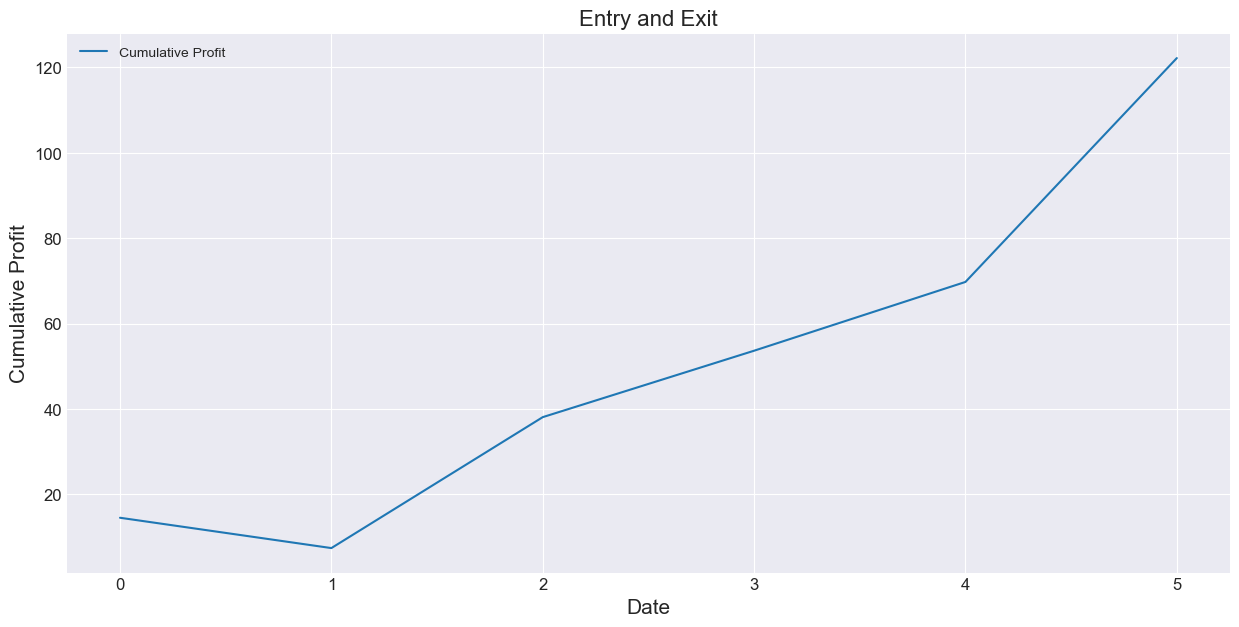

In [ ]:
# Generate a column for cumulative profit
new_tradebook['Cumulative Profit'] = new_tradebook['Profit'].cumsum()

# Define the figure size for the plot
plt.figure(figsize=(15, 7))

# Plot the close price of the underlying
profit = new_tradebook['Cumulative Profit'].plot()

# Set the title and axis labels
profit.set_title('Entry and Exit', fontsize=16)
profit.set_ylabel('Cumulative Profit', fontsize=15)
profit.set_xlabel('Date', fontsize=15)

# Add a legend to the axis
plt.legend(loc='best')

# Define the tick size for the x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()